# Descriptive Stats & Correlation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Distribution Plotting

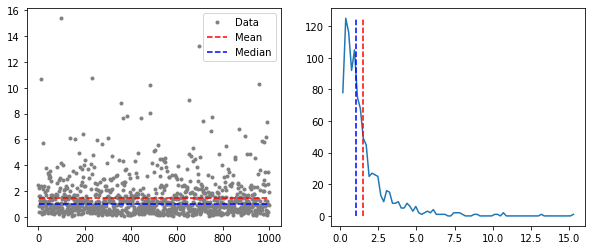

In [2]:
# a lognormal distribution
n = 1000
nbins = 80
data = np.exp(.9*np.random.randn(n) + 0)

y,x = np.histogram(data,nbins)
x = (x[:-1]+x[1:])/2 # removes a point by taking the average of each pt excluding first and each pt excluding last

datamean = np.mean(data)
datamedian = np.median(data)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(data,'.',color=[.5,.5,.5],label='Data')
ax[0].plot([1,n],[datamean,datamean],'r--',label='Mean')
ax[0].plot([1,n],[datamedian,datamedian],'b--',label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean,datamean],[0,max(y)],'r--')
ax[1].plot([datamedian,datamedian],[0,max(y)],'b--')
plt.show()

C:\Users\17809\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


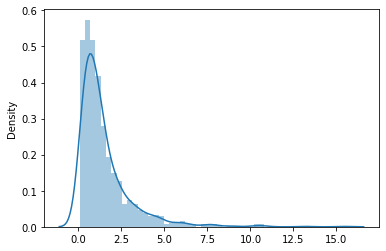

In [3]:
import seaborn as sns
sns.distplot(data, kde=True);

## CDFs and Percentiles

In [4]:
from scipy.stats import norm
# scipy.stats.bernoulli
# scipy.stats.binom
# scipy.stats.betabinom
# scipy.stats.poisson
# scipy.stats.planck
# scipy.stats.logser

# simulate human height
mu = 170
sd = 7

# generate samples
x = norm.rvs(loc=mu, scale=sd, size=100)

In [5]:
# at what height are you in the 95th percentile?
res = norm.ppf(0.95, loc=mu, scale=sd)
print(f"At {round(res,0)} cm, you are in the 95th percentile")

At 182.0 cm, you are in the 95th percentile


In [6]:
# you are 160 cm tall, what percentile are you in?
res = norm.cdf(160, loc=mu, scale=sd)
print(f"If 160 cm tall, you are in percentile {round(res,3)*100}")

If 160 cm tall, you are in percentile 7.7


In [7]:
# you are 185 cm tall, what is the probability that someone is taller than you?
res = 1 - norm.cdf(185, loc=mu, scale=sd)
print(f"If 185cm tall, the probability that someone is taller than you is {round(res,3)}")

If 185cm tall, the probability that someone is taller than you is 0.016


## Correlation

### Pearson R

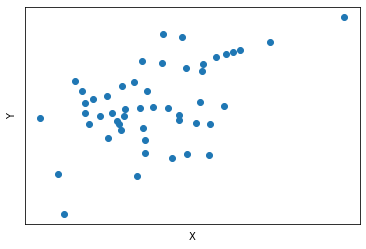

R: 0.521
p: 0.0


In [21]:
N = 50
x = np.random.randn(N)
y = x/2.5 + np.random.randn(N)

plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([])
plt.yticks([])
plt.show()

r,p = stats.pearsonr(x,y)
print(f"R: {round(r,3)}")
print(f"p: {round(p,3)}")

### Pearson, Kendall, and Spearman Correlation

In [33]:
corr = stats.pearsonr(x,y)
print(f"Pearson's Correlation: {round(corr[0],3)}, p-value: {round(corr[1],3)}")

corr = stats.kendalltau(x,y)
print(f"Kendall's Correlation: {round(corr[0],3)}, p-value: {round(corr[1],3)}")

corr = stats.spearmanr(x,y)
print(f"Spearman's Correlation: {round(corr[0],3)}, p-value: {round(corr[1],3)}")

Pearson's Correlation: 0.521, p-value: 0.0
Kendall's Correlation: 0.277, p-value: 0.005
Spearman's Correlation: 0.402, p-value: 0.004
